# Problem Statement

In the financial sector, predicting whether a borrower will repay a loan is a critical task for minimizing credit risk and optimizing lending decisions. This project focuses on developing a machine learning model to accurately predict loan repayment outcomes based on borrower profiles and loan characteristics.

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import dataset


In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/DataSets/loan_data.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis

Viewing first few rows

In [6]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Knowing shape of dataset (rows and columns)

In [7]:
dataset.shape

(9578, 14)

Columns of dataset

In [8]:
dataset.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Summary of dataset

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Missing values in each column of dataset

In [10]:
dataset.isnull().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


Missing values percentage in each column of dataset

In [11]:
null_percentage = (dataset.isnull().sum()/ len(dataset)) * 100
null_percentage

,0
credit.policy,0.0
purpose,0.0
int.rate,0.0
installment,0.0
log.annual.inc,0.0
dti,0.0
fico,0.0
days.with.cr.line,0.0
revol.bal,0.0
revol.util,0.0


checking duplicated rows

In [12]:
dupRows = dataset[dataset.duplicated()]
dupRows

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


Knowing statastical information of dataset

In [13]:
dataset.describe(include='all')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


Counting frequency of target feauture

In [14]:
dataset['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


Visualizing the distribution of target variable 'not.fully.paid' (our target column) by using count plot

Text(0, 0.5, 'Count')

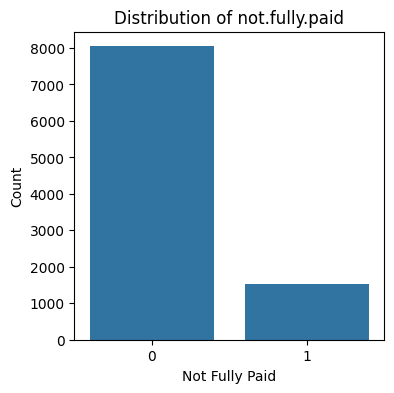

In [15]:
plt.figure(figsize=(4, 4))
sns.countplot(x='not.fully.paid', data=dataset)
plt.title('Distribution of not.fully.paid')
plt.xlabel('Not Fully Paid')
plt.ylabel('Count')

Finding relationships of non target numerical feautures with target feauture

In [16]:
numerical_data = dataset.select_dtypes(include=['number', 'bool'])

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_with_target = correlation_matrix['not.fully.paid']

correlation_with_target

,not.fully.paid
credit.policy,-0.158119
int.rate,0.159552
installment,0.049955
log.annual.inc,-0.033439
dti,0.037362
fico,-0.149666
days.with.cr.line,-0.029237
revol.bal,0.053699
revol.util,0.082088
inq.last.6mths,0.149452


visualizing relation of feautures in dataset by using heat map

<Axes: >

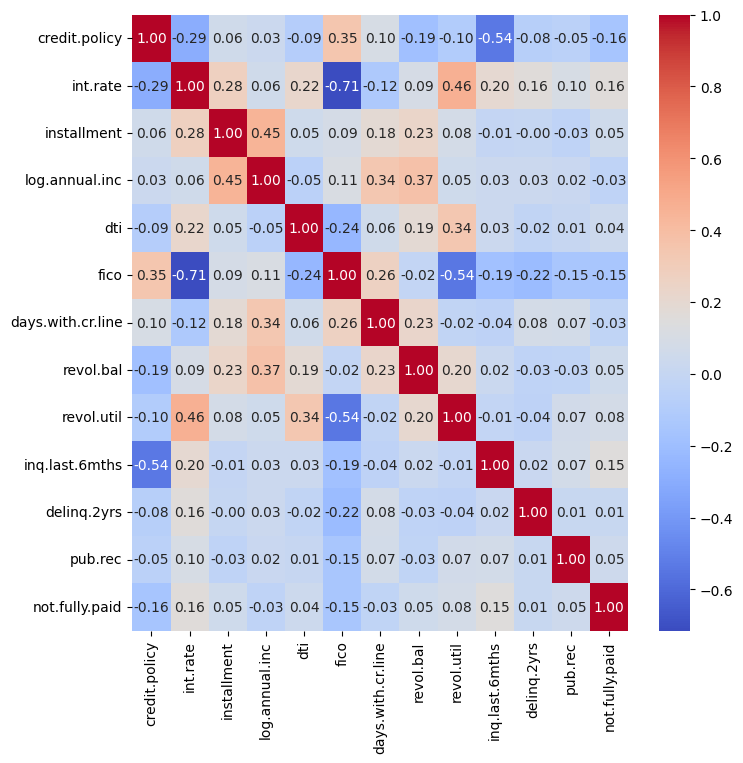

In [17]:
numerical_feautures = dataset.select_dtypes(include=['int64', 'float64']).columns
corr_mat = dataset[numerical_feautures].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# HANDLING OUTLIERS

Visualizing Outliers in dataset through Box plot


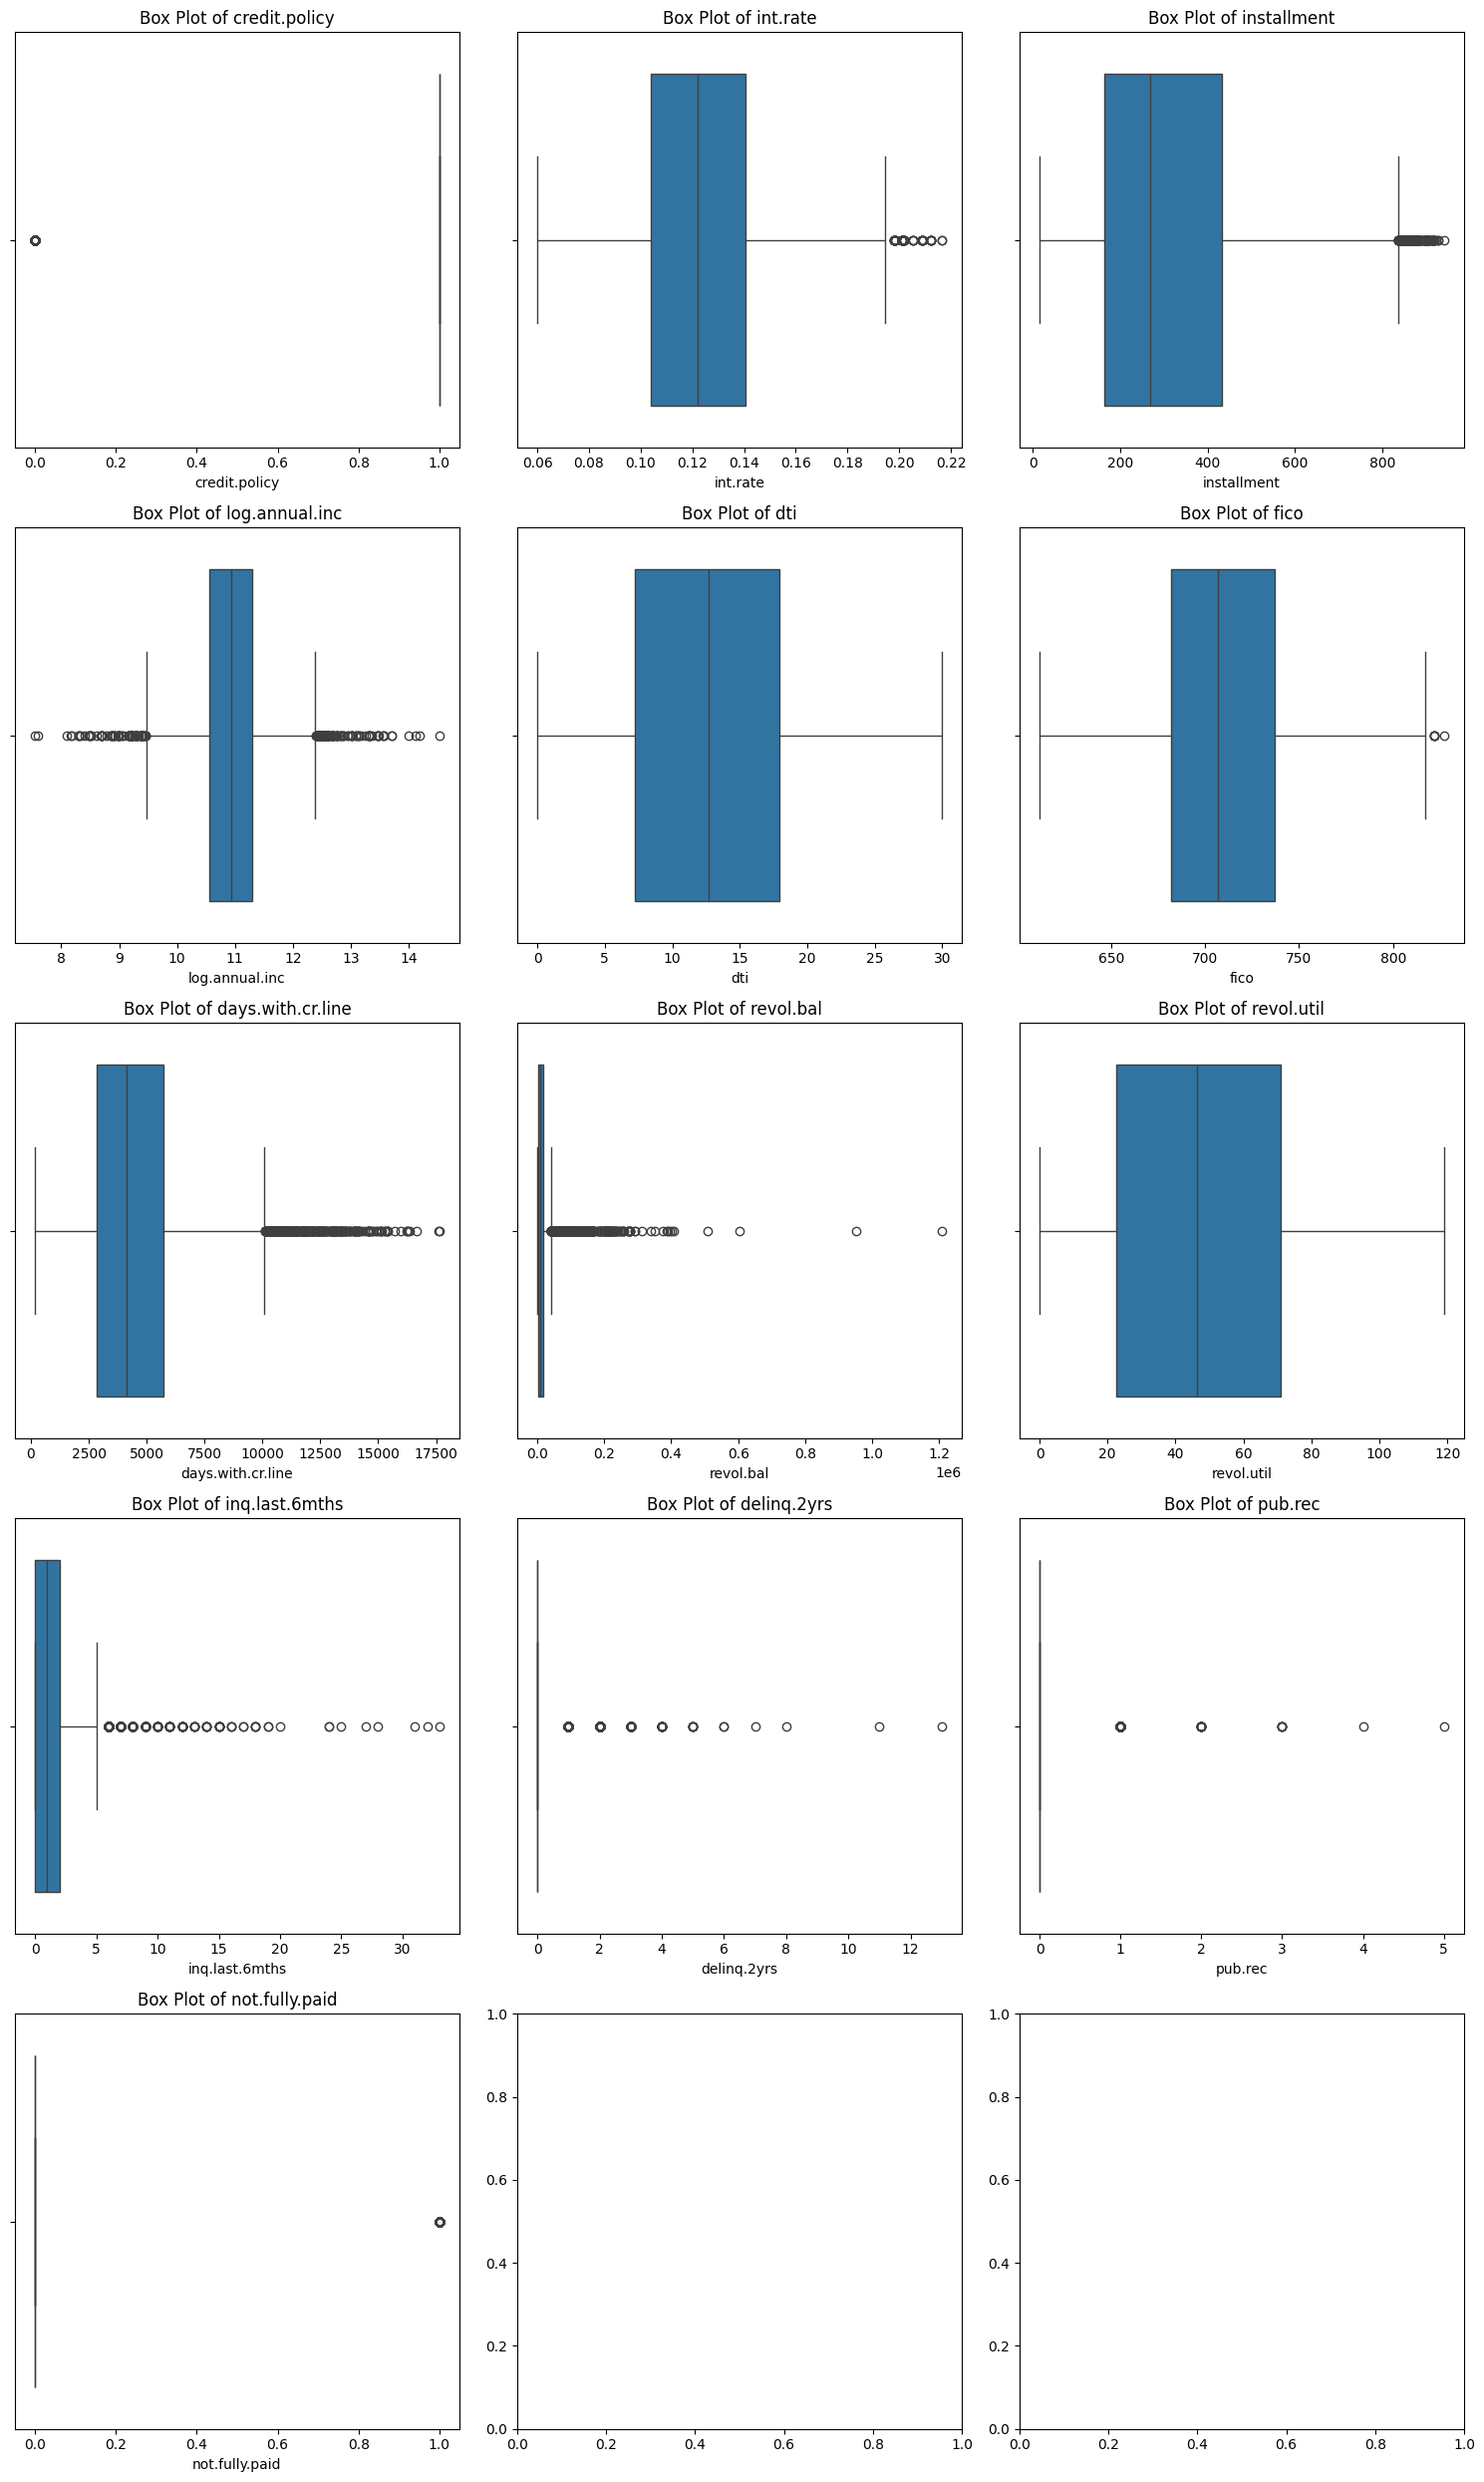

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical features for the box plot
numerical_features = dataset.select_dtypes(include=['number']).columns

# Calculating the number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Creating a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Iterating through features and create box plots in subplots
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.boxplot(x=dataset[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

Visualizing outlier percentage of each column by box plot

In [19]:
def outlier_percentage(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  percentage = (len(outliers) / len(data)) * 100
  return percentage

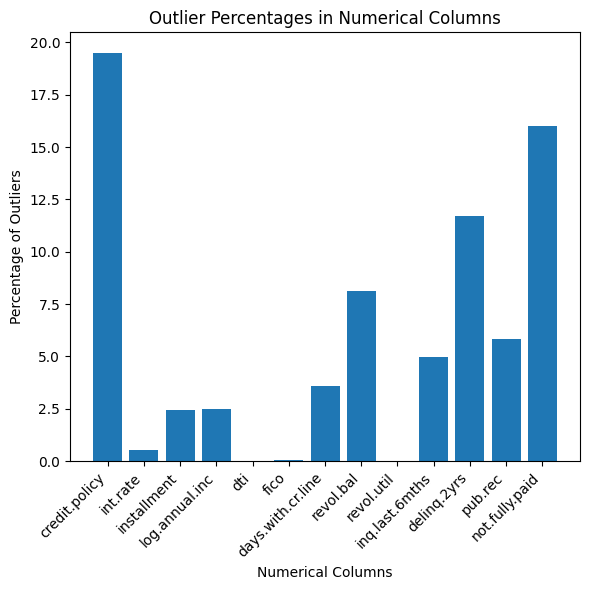

In [20]:
numerical_cols = dataset.select_dtypes(include=np.number).columns
outlier_percentages = []

for col in numerical_cols:
    percentage = outlier_percentage(dataset, col)
    outlier_percentages.append(percentage)


plt.figure(figsize=(6, 6))
plt.bar(numerical_cols, outlier_percentages)
plt.xlabel("Numerical Columns")
plt.ylabel("Percentage of Outliers")
plt.title("Outlier Percentages in Numerical Columns")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Removing outliers in some of the columns of dataset

In [21]:
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [22]:
columns_with_outliers = ['int.rate', 'installment', 'log.annual.inc', 'fico']
dataset = remove_outliers_iqr(dataset, columns_with_outliers)

Finding no.of rows and columns after removing outliers


In [23]:
dataset.shape

(9065, 14)

Imputing outliers with flooring and capping values in remaining columns

In [24]:
def fill_outliers_with_flooring_capping(data, columns):
  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.clip(data[column], lower_bound, upper_bound)
  return data

In [25]:
columns_with_outliers = ['credit.policy', 'days.with.cr.line', 'revol.bal','inq.last.6mths','delinq.2yrs','pub.rec']
dataset = fill_outliers_with_flooring_capping(dataset, columns_with_outliers)

checking outliers percentage after removing in each column

In [26]:
def outlier_percentage(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    percentage = (len(outliers) / len(data)) * 100
    return percentage

numerical_cols = dataset.select_dtypes(include=np.number).columns

for col in numerical_cols:
    percentage = outlier_percentage(dataset, col)
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")

Percentage of outliers in credit.policy: 0.00%
Percentage of outliers in int.rate: 0.13%
Percentage of outliers in installment: 1.97%
Percentage of outliers in log.annual.inc: 0.46%
Percentage of outliers in dti: 0.00%
Percentage of outliers in fico: 0.00%
Percentage of outliers in days.with.cr.line: 0.00%
Percentage of outliers in revol.bal: 0.00%
Percentage of outliers in revol.util: 0.00%
Percentage of outliers in inq.last.6mths: 0.00%
Percentage of outliers in delinq.2yrs: 0.00%
Percentage of outliers in pub.rec: 0.00%
Percentage of outliers in not.fully.paid: 15.43%


copying and assigning of dataset after removing outliers and assigning to updated_set


In [27]:
updated_set = dataset.copy()

# ENCODING

Applying one hot encoding technique to the purpose feauture

In [28]:
updated_set = pd.get_dummies(updated_set, columns=['purpose'], drop_first=True)

checking the no.of feautures after applying one hot encoding

In [29]:
updated_set.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

# Applying different Machine learning models to the updated_set

Splitting the updated_dataset into training and testing data

In [31]:
from sklearn.model_selection import train_test_split

# Separating features (X) and target variable (y)
X = updated_set.drop(columns=['not.fully.paid'])
y = updated_set[['not.fully.paid']]

# Splitting the data into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Show the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6798, 18)
Shape of y_train: (6798, 1)
Shape of X_test: (2267, 18)
Shape of y_test: (2267, 1)


Applying logistic classification model


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression.fit(X_train, y_train)

# training accuracy
train_predictions = logistic_regression.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"training accuarcy: {train_accuracy:.4f}")

# testing accuracy
test_predictions = logistic_regression.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy : {test_accuracy:.4f}")

# overall accuracy
lr_predictions = logistic_regression.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

training accuarcy: 0.8427
Testing Accuracy : 0.8544
Logistic Regression Accuracy: 0.8544331715924128


Applying Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and train the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=50,random_state=40)
random_forest.fit(X_train, y_train)

# training accuracy
train_predictions = random_forest.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy : {train_accuracy:.4f}")

# testing accuracy
test_predictions = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy : {test_accuracy:.4f}")

# overall accuracy
rf_predictions = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Training Accuracy : 0.9993
Testing Accuracy : 0.8531
Random Forest Accuracy: 0.8531098367887076


Applying Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Gradient Boosting Classifier
gradient_boost = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=6, min_samples_split=3, random_state=42)
gradient_boost.fit(X_train, y_train)

# training data accuracy
train_predictions = gradient_boost.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy : {train_accuracy:.4f}")

# testing data accuracy
test_predictions = gradient_boost.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy : {test_accuracy:.4f}")

# overall accuracy
gb_predictions = gradient_boost.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Training Accuracy : 0.8485
Testing Accuracy : 0.8553
Gradient Boosting Accuracy: 0.855315394794883


Applying Support Vector Machine

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize and train the Support Vector Machine (SVM) model
svm = SVC(random_state=100)
svm.fit(X_train, y_train)

# Predictions and accuracy on training data
train_predictions = svm.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy (SVM): {train_accuracy:.4f}")

# Predictions and accuracy on testing data
test_predictions = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy (SVM): {test_accuracy:.4f}")


svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)


Training Accuracy (SVM): 0.8426
Testing Accuracy (SVM): 0.8549
SVM Accuracy: 0.854874283193648


As we checked earlier our dataset is not balaced.Hence balancing the dataset and applying gradient boosting

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after oversampling:")
print(pd.Series(y_train_resampled.values.ravel()).value_counts())

Class distribution after oversampling:
0    5728
1    5728
Name: count, dtype: int64


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gradient_boost = GradientBoostingClassifier(n_estimators=100, random_state=30)

# Training the model on the resampled data
gradient_boost.fit(X_train_resampled, y_train_resampled)

# Predictions and accuracy on training data
train_predictions = gradient_boost.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Predictions and accuracy on testing data
test_predictions = gradient_boost.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Overall accuracy (same as testing accuracy in this case)
overall_accuracy = accuracy_score(y_test, test_predictions)
print("Overall Accuracy:", overall_accuracy)

Training Accuracy: 0.7722
Testing Accuracy: 0.6974
Overall Accuracy: 0.6973974415527129


creating dataframe for accuracies of different models

In [ ]:
data = {
    'Model': ['logistic regression', 'Random Forest classifier', 'Gradient boosting', 'Support vector machine', 'Gradient_boosting_after_balancing'],
    'Accuracy': [0.85, 0.85, 0.86, 0.85, 0.69]
}

dataframe = pd.DataFrame(data)
dataframe

,Model,Accuracy
0,logistic regression,0.85
1,Random Forest classifier,0.85
2,Gradient boosting,0.86
3,Support vector machine,0.85
4,Gradient_boosting_after_balancing,0.69


classification report of selected algorithm (Gradient Boosting)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gradient_boost = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=6, min_samples_split=3, random_state=42)
gradient_boost.fit(X_train, y_train)
gb_predictions = gradient_boost.predict(X_test)

report = classification_report(y_test, gb_predictions)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1938
           1       0.60      0.01      0.02       329

    accuracy                           0.86      2267
   macro avg       0.73      0.50      0.47      2267
weighted avg       0.82      0.86      0.79      2267



Confusion matrix of selected model (gradient boosting algorithm)

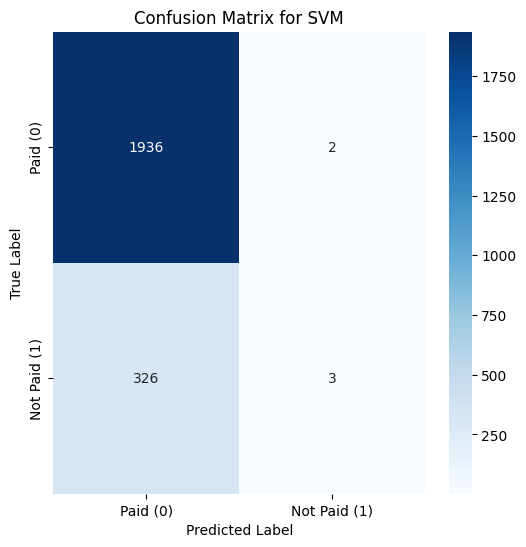

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, gb_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Paid (0)', 'Not Paid (1)'], yticklabels=['Paid (0)', 'Not Paid (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM")
plt.show()


K-fold Validation

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gradient_boost = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=6, min_samples_split=3, random_state=42)
gradient_boost.fit(X_train, y_train)
k = 5
scores = cross_val_score(gradient_boost, X_train, y_train, cv=k, scoring='accuracy')

# Display the results
print(f"Cross-Validation Accuracies for {k}-folds: {scores}")
print(f"Mean Cross-Validation Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation of Accuracies: {scores.std():.4f}")

Cross-Validation Accuracies for 5-folds: [0.83970588 0.84191176 0.84117647 0.84473878 0.84253127]
Mean Cross-Validation Accuracy: 0.8420
Standard Deviation of Accuracies: 0.0017


# Results and Conclusions



*   The dataset contained no null values, ensuring completeness and reliability for analysis.
*   Outliers were handled effectively using trimming, flooring, and capping methods, improving data consistency and minimizing the impact of extreme values.
*   Categorical columns were transformed using one-hot encoding, enabling their integration into machine learning models.
*   Multiple machine learning models were tested, including Logistic Regression, Random Forest Classifier, Gradient Boosting, Support Vector Machine (SVM), and Gradient Boosting after class balancing.
*   Gradient Boosting achieved the highest accuracy of 0.86, demonstrating its effectiveness in predicting loan outcomes and capturing the underlying data patterns.



